# Statistics for Artificial Intelligence and Data Science - Coursework 1

### Introduction

This notebook contains and presents an analysis of the demographic data for Lower Layer Super Output Areas (LSOAs) in England - based on the 2021 Census.
The aim is to manipulate the data using **Pandas, Numpy and Matplotlib**, analyse the population age distributions and visualise demographic patterns across England and selected LSOAs.

Please refer to the below where the contents of each section has been laid out:

- **Part 1:** Bar chart of the age profile.
- **Part 2:** Distribution of younger, older and median ages.
- **Part 3:** Comparison of median ages by area type
- **Part 4:** Classification of unusual areas by proportions
- **Part 5:** Mapping through the use of GeoPandas

## Data Import and Initial Inspection

The dataset used for this analysis contains demographic information for each **Lower Layer Super Output Area (LSOA)** in England.
Each row represents one LSOA, this includes the total population counts and breakdowns by 5 year age bands.

The columns show the following:
- **LSOA identifiers** ('LSOAName', 'LSOACode')
- **Parent Region Information** ('PartOfCode', 'PartOfName')
- **Total Population**
- **Eighteen 5 year age band columns** (from 0-4 to 85+)

The code below: 
1. Imports the required Python libraries - **Pandas** for data manipulation, **NumPy** for numeric operations, **Matplotlib** for visualisation.

2. Loads the CSV dataset.

3. Displays basic information and summary statistics.  
   

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
lsoa_df = pd.read_csv('/home/jovyan/Stats for DS AI/Coursework 1 Files/LSOA_data.csv')

lsoa_df

,LSOAName,LSOACode,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,...,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over
0,City of London 001A,E01000001,E09000001,City of London,1473,52,34,32,23,90,...,114,105,89,73,83,119,102,57,57,35
1,City of London 001B,E01000002,E09000001,City of London,1384,33,24,22,31,100,...,92,98,122,88,87,76,69,59,43,30
2,City of London 001C,E01000003,E09000001,City of London,1613,39,32,33,23,96,...,111,113,155,118,111,86,85,50,31,33
3,City of London 001E,E01000005,E09000001,City of London,1101,52,45,35,89,118,...,61,58,87,82,67,35,26,17,14,12
4,Barking and Dagenham 016A,E01000006,E09000002,Barking and Dagenham,1842,153,127,110,122,124,...,164,153,121,85,70,66,41,18,17,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,Vale of White Horse 014H,E01035758,E07000180,Vale of White Horse,1169,39,45,58,38,63,...,67,76,81,57,49,57,70,46,70,77
33751,Vale of White Horse 015G,E01035759,E07000180,Vale of White Horse,1519,116,107,82,66,62,...,91,100,111,106,102,56,75,58,29,32
33752,Vale of White Horse 015H,E01035760,E07000180,Vale of White Horse,1610,206,152,97,49,59,...,156,62,41,30,24,14,15,13,20,33
33753,Vale of White Horse 015I,E01035761,E07000180,Vale of White Horse,1609,184,121,98,58,62,...,113,84,66,50,37,50,40,23,32,29


### Dataset Overview

The first initial rows of the dataset have been displayed.

Using '.describe()' helps to summarise numerical variables and check for unusual values or missing data.
This step ensures data quality before any analysis is carried out.
Inspecting summary statistics also gives context - for example, the average total population per LSOA and the range of values across age groups.

The output below shows that the average LSOA has approximately **1,670 residents**, with populations ranging between around **1,000 and 10,000** people.
The age group counts vary widely, which reflects the demographic diversity across England.

This data forms the basis for analysing the age structure and regional differences in the following sections of this notebook.

In [3]:
lsoa_df.describe()

,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over
count,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000
mean,1673.532543,91.152451,99.205333,101.121760,95.359147,101.150852,110.069234,117.098622,112.438631,106.072937,106.730262,115.770760,112.761783,96.461472,81.984713,82.851992,60.397215,42.250985,40.654392
std,353.289631,39.878912,38.806059,38.541502,85.773958,104.332309,61.129450,55.361979,43.772034,35.423598,29.967067,29.968016,31.367987,30.478260,31.319047,39.093585,31.974745,23.146466,26.988001
min,999.000000,2.000000,2.000000,0.000000,2.000000,16.000000,13.000000,10.000000,17.000000,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1443.000000,63.000000,73.000000,75.000000,67.000000,63.000000,71.000000,79.000000,82.000000,81.000000,86.000000,97.000000,94.000000,78.000000,61.000000,55.000000,37.000000,25.000000,21.000000
50%,1608.000000,84.000000,93.000000,96.000000,84.000000,81.000000,96.000000,107.000000,105.000000,100.000000,103.000000,113.000000,111.000000,94.000000,79.000000,78.000000,56.000000,39.000000,35.000000
75%,1835.000000,111.000000,120.000000,121.000000,106.000000,106.000000,131.000000,142.000000,135.000000,126.000000,123.000000,132.000000,129.000000,112.000000,99.000000,106.000000,79.000000,55.000000,53.000000
max,9900.000000,548.000000,615.000000,475.000000,3762.000000,4157.000000,1202.000000,634.000000,494.000000,424.000000,333.000000,308.000000,295.000000,278.000000,272.000000,363.000000,303.000000,223.000000,366.000000


## Part 1 - Bar Chart of the Age Profile

### Requirement 1: Plotting Bar Chart

### Objective
The objective of this section is to show the proportions of the total England population in each 5 year age range.
This helps illustrate the overall age structure of England and provides a reference for comparing local areas.

### Method
To obtain the national profile, we:
- **Sum each age band column** across all LSOAs to get England-wide totals. This aggregates local counts to a single national count per age band.

- **Divide by the grand total population** to convert counts to **proportions**, allowing age groups to be compared on the same scale.

- **Plot a bar chart** to display proportions by age band.

**lsoa_df[age_columns].sum()** is used because Pandas can efficiently add values column-wise.

Dividing by **england_totals.sum()** normalises the data so that differences reflect *relative* population shares rather than absolute numbers.

<function matplotlib.pyplot.show(close=None, block=None)>

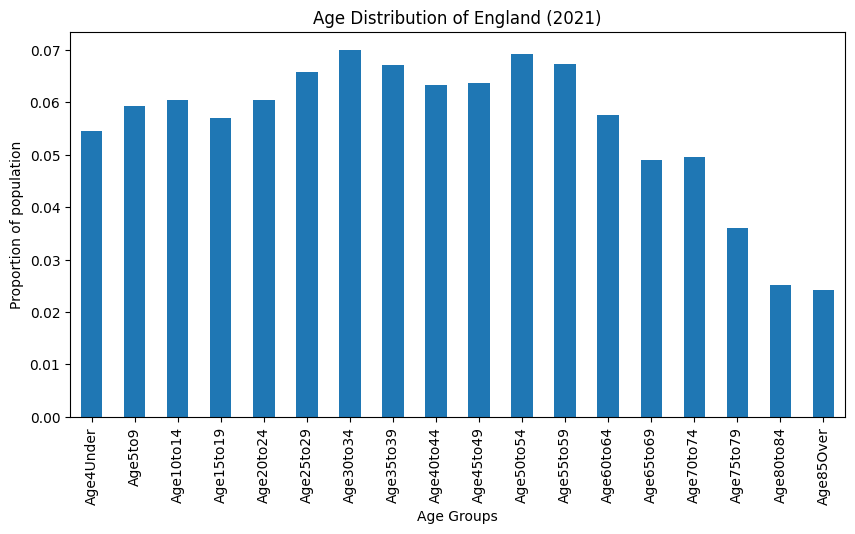

In [4]:
age_columns = ['Age4Under','Age5to9','Age10to14','Age15to19',
            'Age20to24','Age25to29','Age30to34','Age35to39',
            'Age40to44','Age45to49','Age50to54','Age55to59',
            'Age60to64','Age65to69','Age70to74','Age75to79',
            'Age80to84','Age85Over']

england_totals = lsoa_df[age_columns].sum()

england_proportions = england_totals / england_totals.sum()

england_proportions.plot(kind = 'bar', figsize = (10,5))
plt.ylabel('Proportion of population')
plt.xlabel('Age Groups')
plt.title('Age Distribution of England (2021)')
plt.show

### Interpretation of Bar Chart

The bar chart above shows that the largest population groups are those ages **30-59**, while the smallest are those **under 5** and **over 85**.
This pattern reflects a typical working-age population distribution - with fewer people in the youngest and oldest age ranges.

The overall age profile of England can therefore be decribed as **middle-heavy**, which indicates a predominantly adult population.

### Requirement 2: Comparing Three LSOAs to the National Profile

### Objective
To explore how local areas differ from the national pattern by comparing three LSOAs:

- **E01005044** (Bury 026E)
- **E001020395** (Dorset 024A)
- **E01009136** (Birmingham 014E)

### Method
For each LSOA:

1. Extract its row using its unique code, through the use of **lsoa_df[lsoa_df['LSOACode'] == code]**.

2. Divide its age band counts by its 'Total' to obtain **proportions**.
This step ensures comparability regardless of population size.

3. Combine all four profiles (England + 3 LSOAs) into a dataframe and plot a **grouped bar chart**.

We use a grouped bar chart as it allows for easy visual comparison of multiple distributions across the same categories. Normalising each LSOA's counts avoids bias from total population differences.

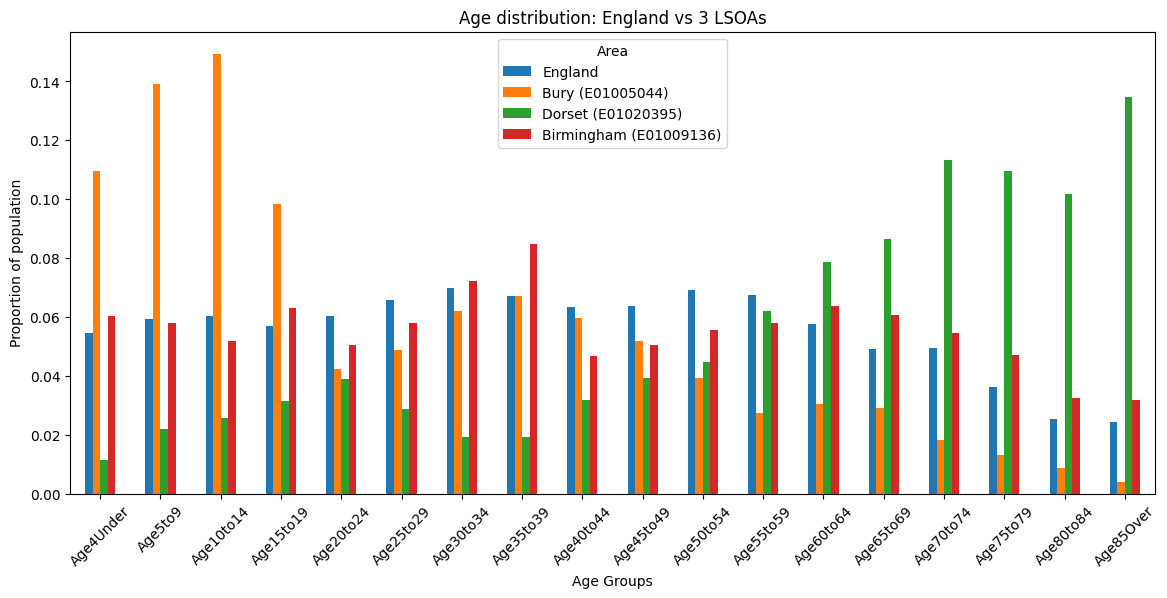

In [5]:

codes = ['E01005044', 'E01020395', 'E01009136']
lsoa_profiles = {}

for code in codes:
    row = lsoa_df[lsoa_df['LSOACode'] == code].iloc[0]
    lsoa_profiles[code] = row[age_columns] / row['Total']

comparison = pd.DataFrame({'England': england_proportions})

for code, profile in lsoa_profiles.items():
    comparison[code] = profile

area_names = {'E01005044' : 'Bury (E01005044)',
              'E01020395' : 'Dorset (E01020395)',
              'E01009136' : 'Birmingham (E01009136)'
             }

comparison = comparison.rename(columns = area_names)

comparison.plot(kind = 'bar', figsize = (14,6))

plt.xticks(rotation = 45)
plt.ylabel('Proportion of population')
plt.xlabel('Age Groups')
plt.title('Age distribution: England vs 3 LSOAs')
plt.legend(title = 'Area')
plt.show()


### Interpretation of Comparative Chart

The comparison from the grouped bar chart highlights clear demographic differences between the selected LSOAs and the England average:

- **Bury (E01005044)** has a relatively balanced age structure close to the national pattern.
  
- **Dorset (E01020395)** shows a noticeably older population, with higher proportions of residents aged over 60.

- **Birmingham (E01009136)** displays a younger profile, with a larger share of residents under 25.

These variations reflect broader regional trends - rural and coastal areas often have older populations, while urban centres have more young adults and children.

### Requirement 3: Explanation of Differences

The differences in age distributions between local areas and the national average can be explained by several demographic and socio-economic factors:

- **Urban vs Rural Variation:**
Urban areas, such as Birmingham, typically have younger populations because they attract students, recent graduates and working-age adults who are seeking employment and education oppertunities.

- **Retirement Migration:**
Rural and coastal areas, such as Dorset, often have older populations as they are popular destinations for retirement and have lower rates of youth in-migration.


- **Housing and Family Patterns:**
Suburban areas like Bury often have more families with children, producing a more balanced age profile. In contrast, city centres with higher housing costs and smaller accommodation sites tend to have fewer young dependents.

- **Economic Opportunity and Mobility:**
Regions with greater access to jobs, transport and universities retain younger adults, while areas with fewer oppertunities experience out-migration of younger residents. This results in older local populations.

These social and geographic influences explain why some LSOAs deviate from the national age structure. They demonstrate how population composition is closely linked to **location, lifestyle and economic context**.

## Part 2 - Distribution of Younger, Older and Median Ages in Each LSOA.

### Requirement 1a & b: Adding New Columns

### Objective
The goal of this section is to examine how the age composition varies across England's LSOAs by creating three key measures for each area:

1. The **proportion of younger residents**.
2. The **proportion of older residents**.
3. An **estimated median age**.

This analysis helps reveal regional differences in population structure and the extent to which communities are younger or older than average.

### Method

We start by creating two new columns in the dataframe:

- 'younger_prop': the proportion of people aged under 20, calculated from the first four age bands ('Age4Under' to 'Age15to19').

- 'older_prop': the proportion of people aged 65 and over, based on the last five age groups ('Age65to69' to 'Age85Over').

Each value is obtained by summing the relevant age band counts **across columns** through the use of: 

**lsoa_df[['Age4Under',...,'Age15to19']].sum(axis = 1)** 

We then divide by the total population of that LSOA.

Using **axis = 1** ensures that the sum runs *horizontally* across columns for each row (i.e. per LSOA).

We then use **.describe()** to summarise these new variables, which provides a quick overview of their central tendency and range across England.

In [6]:
lsoa_df['younger_prop'] = lsoa_df[['Age4Under', 'Age5to9', 'Age10to14', 'Age15to19']].sum(axis = 1)/lsoa_df['Total']

lsoa_df['older_prop'] = lsoa_df[['Age65to69', 'Age70to74', 'Age75to79', 'Age80to84', 'Age85Over']].sum(axis = 1)/lsoa_df['Total']


lsoa_df[['younger_prop','older_prop']].describe()

,younger_prop,older_prop
count,33755.000000,33755.000000
mean,0.227832,0.189168
std,0.055301,0.085520
min,0.018081,0.000736
25%,0.192297,0.123995
50%,0.223183,0.182751
75%,0.258689,0.246851
max,0.628793,0.655409


### Interpretation of Summary Statistics

The summary statistics above show, on average, that:

- Younger residents make up around **23%** of each LSOA's population.
- Older residents (65+) account for around **19%** on average.

However, the wide range (from approximately 2% to over 60%) indicates strong variation across England. Especially from predominantly young urban areas to older rural and coastal communities.

### Requirement 1c & 2: Calculating the Median Age and Histograms

To estimate the median age in each LSOA, we create a function which has been named as **'median_from_counts()'**.

This function applies a cumulative proportion approach as outlined below:

1. Convert the series of age band counts into a NumPy array.
   
2. Compute the **cumulative sum** of these counts and divide by the total population to obtain the cumulative proportion via:

**counts.cumsum() / total**

3. Find the first age band where the cumulative proportion reaches 50% by:

**np.argmax(cumul_prop >= 0.5)**

4. Interpolate within that 5 year age band to estimate the true median.

We then apply this function across every row of the dataset using:

**lsoa_df[age_columns].apply(median_from_counts, axis = 1)**

This produces a new column *median_age*, which gives the estimated median age for each LSOA.


In [7]:
age_columns = ['Age4Under','Age5to9','Age10to14','Age15to19',
            'Age20to24','Age25to29','Age30to34','Age35to39',
            'Age40to44','Age45to49','Age50to54','Age55to59',
            'Age60to64','Age65to69','Age70to74','Age75to79',
            'Age80to84','Age85Over']


lower_age_bound = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

def median_from_counts(counts):
    counts = np.array(counts, dtype = float)
    total = counts.sum()
    cumul_prop = counts.cumsum() / total
    idx = np.argmax(cumul_prop >= 0.5)
    L = lower_age_bound[idx]
    F = 0 if idx == 0 else cumul_prop[idx - 1]
    f = cumul_prop[idx] - F
    return L + 5 * ((0.5 - F) / f)

lsoa_df['median_age'] = lsoa_df[age_columns].apply(median_from_counts, axis = 1)

lsoa_df[['younger_prop', 'older_prop', 'median_age']].describe()


,younger_prop,older_prop,median_age
count,33755.000000,33755.000000,33755.000000
mean,0.227832,0.189168,42.032147
std,0.055301,0.085520,7.782742
min,0.018081,0.000736,14.530516
25%,0.192297,0.123995,36.128752
50%,0.223183,0.182751,41.460674
75%,0.258689,0.246851,47.821934
max,0.628793,0.655409,71.875000


### Interpretation of Median Age

The calculated median ages range from around **15 years** to over **70 years**, with an overall mean of around **42 years**.

This suggests that most local areas have a middle-aged population profile, but there are substantial differences between young urban centres and older rural regions.

## Visualising the Distributions

To explore these measures visually, histograms are plotted for the younger proportions, older proportions and median ages across all 33,755 LSOAs.

This is done through the use of **.hist()** method from Pandas. We also increase the number of bins to 30 to provide greater detail on the shape of each distribution.

Each variable is plotted separately with appropriate titles and axis labels.

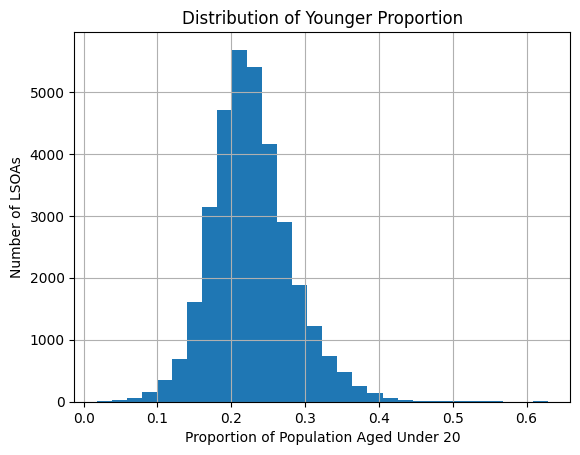

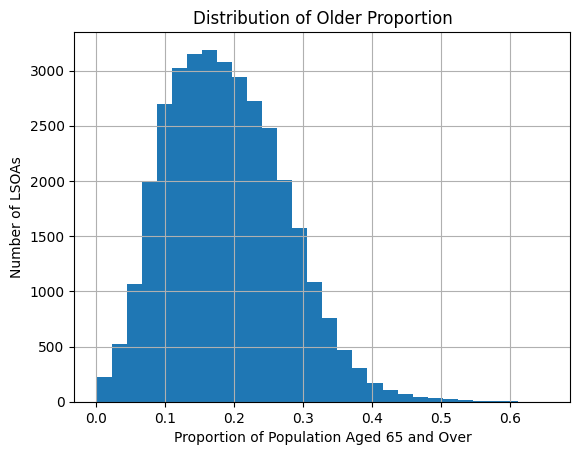

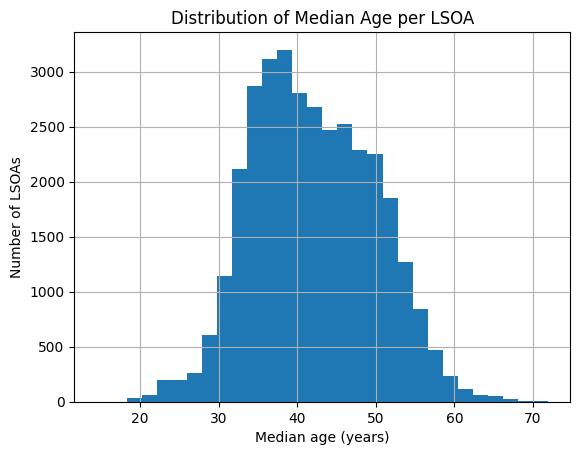

In [8]:
lsoa_df['younger_prop'].hist(bins = 30)
plt.title('Distribution of Younger Proportion')
plt.xlabel('Proportion of Population Aged Under 20')
plt.ylabel('Number of LSOAs')
plt.show()


lsoa_df['older_prop'].hist(bins = 30)
plt.title('Distribution of Older Proportion')
plt.xlabel('Proportion of Population Aged 65 and Over')
plt.ylabel('Number of LSOAs')
plt.show()


lsoa_df['median_age'].hist(bins = 30)
plt.title('Distribution of Median Age per LSOA')
plt.xlabel('Median age (years)')
plt.ylabel('Number of LSOAs')
plt.show()





### Interpretation of Histograms

- The **younger proportion** histogram is roughly bell-shaped with a mild right skew (positive skew), indicating that most LSOAs have similar shares of young people (around 20 to 25%), while a few urban areas contain much younger populations.

- The **older proportion** distribution is strongly right-skewed, showing that while most areas have moderate numbers of older residents (10 to 25%), a small number of rural and coastal regions have much higher proportions, exceeding 50%.

- The **median-age** distribution is roughly symmetric, with a slight left skew (negative skew), peaking around 35-40 years. This indicates that most LSOAs have similar median ages, though a few urban centres have noticeably younger populations.

These patterns and trends confirm that England's population structure varies gradually across the country - most areas are near the national average, but demographic extremes (either very young or very old populations) occur only in a limited number of locations.

### Requirement 3: Comparing the National and LSOA Median Ages

The final step for this section is to compare:

1. The **median age for England as a whole**.
2. The **median of all LSOA median ages**.

We calculate England's value by applying the same **median_from_counts()** function to the **total population counts** for each age band.

This gives a *population-weighted* figure (i.e. larger LSOAs will contribute more). In contrast, the median of the *'median_age'* column treats all LSOAs equally, hence giving an *unweighted* value.

In [9]:
england_median_age = median_from_counts(england_totals.values)

lsoa_median50 = lsoa_df['median_age'].median()

print('England median age, weighted by population, is:', round(england_median_age, 2))

print('The median of LSOA median ages, which is unweighted, is:', round(lsoa_median50, 2))


England median age, weighted by population, is: 40.43
The median of LSOA median ages, which is unweighted, is: 41.46


### Interpretation of Median Comparison

The two values differ slightly as they use different weighted schemes.

The national median (40.4) is **weighted by population**. This means that large, typically younger, urban areas influence the result more strongly. The median of LSOA medians (41.5) gives equal weight to each local area, regardless of its population size.

As a result, this second measure reflects the experience of a 'typical area', while the population-weighted figure reflects the experience of a 'typical person'.

The difference of around one year highlights the demographic imbalance between populous younger regions and sparsely populated older ones.

## Part 3 - Comparing the Median Age Distributions by Area Type

### Requirements 1, 2 & 3: Grouping and Plotting Data.

### Objective
This section investigates whether different types of adminstrative areas in England, such as London Boroughs, Metropolitan Districts, Non-metropolitan Districts and Unitary Authorities, display different median-age profiles.

The analysis groups each LSOA according to the prefix of its 'PartOfCode' variable and compares the median-age distribution for these four categories.

### Method
To classify the LSOAs, we created the function **get_area_type()**. This function extracts the first three characters of each 'PartofCode' (e.g. E06, E07, E08, E09) and assigns the corresponding area type:

- **E06 -> Unitary Autohority**: Typically smaller or mixed urban areas.
- **E07 -> Non-metropolitan Districts**: Usually rural or suburban.
- **E08 -> Metropolitan Districts**: Large cities outside London.
- **E09 -> London Boroughs**: Boroughs within Greater London.

The function was applied by using:

**lsoa_df['area_type'] = lsoa_df['PartOfCode'].apply(get_area_type)**

Then, two visual approaches were used:

1. **Boxplots** to show the spread, medians and outliers of median ages for each area type. Boxplots allow for easier comparison of central tendencies and variability.

2. **Kernel Density Estimation (KDE) plots** to illustrate the shape of each distribution smoothly. Using **kind = 'kde'** shows how tightly or widely median ages are clustered within each category.

### Why these methods were chosen?

- The **boxplot** immediately highlights contrasts in median values and dispersion between area types.

- The **KDE plots** reveal overlapping patterns and subtle shifts in distribution shape that boxplots alone may hide.

- Grouping by *'area_type'* follows the Office for National Statistics (ONS) classification scheme, allowing for comparisons between more rural and more urban populations.


<Figure size 800x600 with 0 Axes>

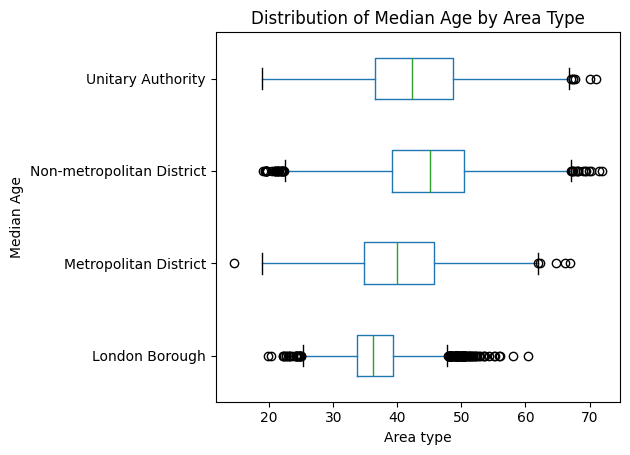

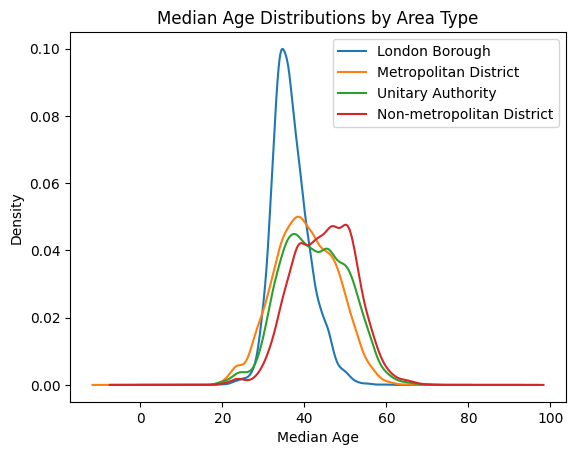

In [10]:
def get_area_type(code):

    prefix = code[:3]
    if prefix == 'E06':
        return 'Unitary Authority'
    elif prefix == 'E07':
        return 'Non-metropolitan District'
    elif prefix == 'E08':
        return 'Metropolitan District'
    elif prefix == 'E09':
        return 'London Borough'
    else:
        return 'Other'


lsoa_df['area_type'] = lsoa_df['PartOfCode'].apply(get_area_type)

plt.figure(figsize = (8,6))
lsoa_df.boxplot(column = 'median_age', by = 'area_type', grid = False, vert = False)
plt.title('Distribution of Median Age by Area Type')
plt.suptitle('')
plt.xlabel('Area type')
plt.ylabel('Median Age')
plt.tight_layout()
plt.show()


for area in lsoa_df['area_type'].unique():
    subset = lsoa_df[lsoa_df['area_type'] == area]
    subset['median_age'].plot(kind = 'kde', label = area)

plt.legend()
plt.title('Median Age Distributions by Area Type')
plt.xlabel('Median Age')
plt.show()


In [11]:
lsoa_df.groupby('area_type')['median_age'].describe()

,count,mean,std,min,25%,50%,75%,max
area_type,,,,,,,,
London Borough,4994.0,36.800077,4.591522,19.776248,33.694074,36.154654,39.382422,60.431034
Metropolitan District,7335.0,40.231440,7.489666,14.530516,34.877418,39.966667,45.723261,66.878981
Non-metropolitan District,12599.0,44.804362,7.481151,19.000406,39.187513,45.050505,50.347754,71.875000
Unitary Authority,8827.0,42.531751,7.988566,18.895301,36.466704,42.281022,48.624298,70.922897


### Results and Interpretation of Plots and Summary Statistics


| Area Type | Approx. Mean Median Age (Years) | Key Observation |
|-----------|-------------------------|-----------------|
|**London Boroughs (E09)**| 36.8 | Lowest median ages, has a narrow spread. This reflects younger, high-density urban populations. |
|**Metropolitan District (E08)** | 40.2 | Slightly older, yet still urban but with more surburban households. |
|**Unitary Authority (E06)** | 42.5 | Moderately older populations, combining city and rural influences. |
|**Non-metropolitan District (E07)** | 44.8 | Oldest median ages, representing rural and coastal areas with ageing residents. |


The **boxplot** displays a clear upward shift in medians from London -> Metropolitan -> Unitary -> Non-metropolitan areas.

The **KDE Curves** confirm this trend - the London Borough curve peaks around 37 years, while rural districts peak nearer 45 years.

Overall, the analysis demonstrates a consistent **urban-rural gradient in age**, where city centres and London have younger populations, whilst rural and semi-rural areas have older residents.

These differences reflect broader demographic patterns too. Urban regions attract younger adults for work and study, while older populations are more concentrated in less urbanised or coastal districts. This supports the idea that geography and economic opportunity strongly shape the age structure across England.



## Part 4 - Classification of Unusual Areas by Proportions

### Requirement 1 & 2: Scatter Plot of Younger vs Older Population

### Objective
To visualise the relationship between the proportions of younger (under 20) and older (65+) residents across England's LSOAs.

### Method
A scatter plot was drawn using:

**plt.scatter(lsoa_df['younger_prop'], lsoa_df['older_prop'], s= 5, alpha = 0.3)**

Each individual point represents one LSOA. A marker size of 5 (**s = 5**) and a transparency of 0.3 (**alpha = 0.3**) was used to help reveal dense areas of overlap.
The x-axis shows the proportion residents under 20 and the y-axis shows the proportion aged 65 and over.

### Why This Method
A scatter plot provides a clear two-dimensional view of how youth and elderly populations vary jointly across England. As there are over 33,000 LSOAs, transparency and small marker size reduce clutter and reveal overall structure.

### Interpretation of Plot
The plot shows a rough **triangular shape**:
- The majority of LSOAs cluster around the middle, where both young and old proportions are moderate.
- A downward slope indicates an **inverse relationship**. This implies that areas with more elderly residents tend to have fewer young people.
- Three corners stand out, representing extreme types:
    a. High young and low old - urban or student-heavy areas.
    b. Low young and high old - rural or retirement areas.
    c. Low young and low old - working age dominated suburbs.

These extremes motivate a classification of LSOAs into distinct demographic types, which is developed in the next section.

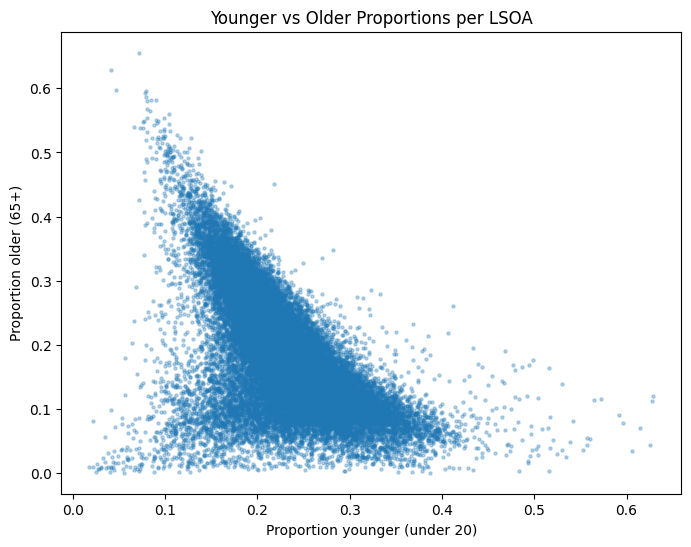

In [12]:
plt.figure(figsize = (8, 6))
plt.scatter(lsoa_df['younger_prop'], lsoa_df['older_prop'], s = 5, alpha = 0.3)
plt.xlabel('Proportion younger (under 20)')
plt.ylabel('Proportion older (65+)')
plt.title('Younger vs Older Proportions per LSOA')
plt.show()

### Requirement 3 & 4: Classification of LSOAs and Regional Patterns

### Objective
To classify each LSOA into demographic categories based on its position in the scatter plot and examine how these categories vary by area type.

### Method
1. To classify areas automatically, the quartile ranges of both proportions were computed and used (Q1 and Q3).

2. A function called **classification()** was created to assign each LSOA using the following rules:

    - **Young:** higher-than-average youth (younger_prop >= Q3) and low elderly (older_prop <= Q1).
  
    - **Old:** higher elderly (older_prop >= Q3) and low youth (younger_prop <= Q1)
  
    - **Workers:** low in both (younger_prop <= Q1, older_prop <= Q1) - mainly working age residents.
  
    - **Normal:** all remaining areas.
  
3. The **classification()** function implements these rules row by row and creates a new column called *class_label* to store the results.

4. A colour-coded scatter plot was then produced to visualise the classified groups using a dictionary of colours and a loop over each label.

5. A pivot table then summarised the number of LSOAs in each class by *area_type*. The *Normal* category was dropped for clarity and a bar chart was drawn to compare frequencies.

### Why This Method
Quartile thresholds create a transparent and data-driven way to define extremes while avoiding arbitrary cut-offs.
colour-coding clearly displays how categories occupy different corners of the triangular shape of our plot, whilst the pivot table quantifies their distribution across urban and rural area types.

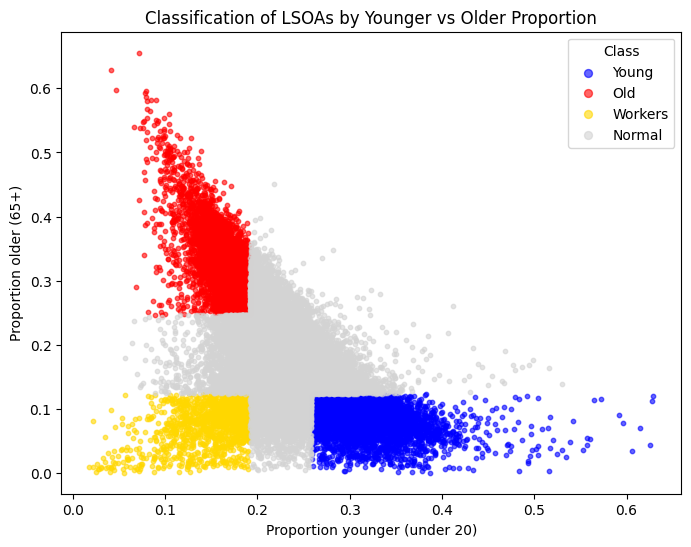

class_label                 Old  Workers  Young
area_type                                      
London Borough               48      662   1186
Metropolitan District       773      219   1382
Non-metropolitan District  2962      140   1001
Unitary Authority          1554      239   1305


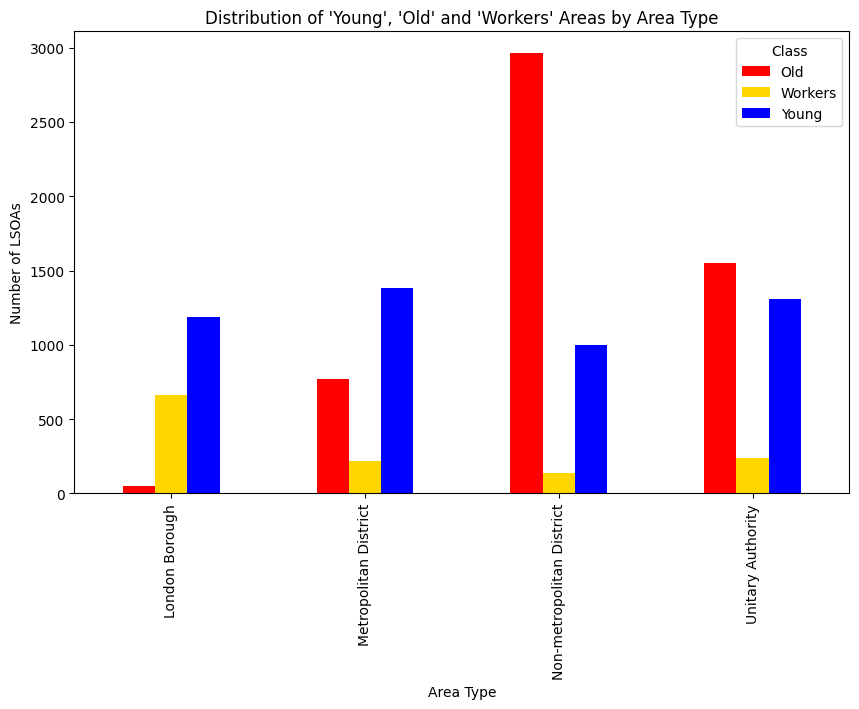

In [13]:
young_Q1 = lsoa_df['younger_prop'].quantile(0.25)
young_Q3 = lsoa_df['younger_prop'].quantile(0.75)
old_Q1 = lsoa_df['older_prop'].quantile(0.25)
old_Q3 = lsoa_df['older_prop'].quantile(0.75)


def classification(row):
    if row['younger_prop'] >= young_Q3 and row['older_prop'] <= old_Q1:
        return 'Young'
    elif row['older_prop'] >= old_Q3 and row['younger_prop'] <= young_Q1:
        return 'Old'
    elif row['younger_prop'] <= young_Q1 and row['older_prop'] <= old_Q1:
        return 'Workers'
    else:
        return 'Normal'

lsoa_df['class_label'] = lsoa_df.apply(classification, axis = 1)


plt.figure(figsize = (8, 6))

colours = {'Young': 'blue',
           'Old': 'red',
           'Workers': 'gold',
           'Normal': 'lightgray'}

for label, colour in colours.items():
    subset = lsoa_df[lsoa_df['class_label'] == label]
    plt.scatter(subset['younger_prop'], subset['older_prop'], s = 10, alpha = 0.6, label = label, color = colour)

plt.xlabel('Proportion younger (under 20)')
plt.ylabel('Proportion older (65+)')
plt.title('Classification of LSOAs by Younger vs Older Proportion')
plt.legend(title = 'Class', markerscale = 1.8)
plt.show()


pivot_counts = lsoa_df.pivot_table(index = 'area_type', columns = 'class_label', values = 'LSOACode', aggfunc = 'count', fill_value = 0)

pivot_no_normal = pivot_counts.drop(columns = 'Normal', errors = 'ignore')

pivot_no_normal.plot(kind = 'bar', figsize = (10,6), color = [colours[col] for col in pivot_no_normal.columns])

print(pivot_no_normal)

plt.title("Distribution of 'Young', 'Old' and 'Workers' Areas by Area Type")
plt.xlabel('Area Type')
plt.ylabel('Number of LSOAs')
plt.legend(title = 'Class')
plt.show()


### Interpretation of Results
The coloured scattered plot clearly seperates the demographic types:
- **Young areas (blue):** high younger population and low elderly share - typical of university towns and inner cities.
      
- **Old areas (red):** high elderly proportion and low youth - often rural or coastal districts.
 
- **Workers areas (yellow):** low proportions of both young and old - mainly working-age communities and usually urban suburbs.


The pivot table and bar chart reveal clear regional patterns:

- **London Boroughs** and **Metropolitan Districts** contain the largest numbers of 'Young' LSOAs, reflecting their younger urban populations.
  
- **Non-metropolitan Districts** have the most 'Old' areas, confirming their rural and retirement-dominated demographics.

- **Unitary Authorities** show a balanced mix - they contain both young and old populations, consistent with their role as mixed urban-rural regions that often include a main town and its surrounding countryside.

- **Workers** areas are comparatively few and spread across all types.

These results confirm a strong urban-rural gradient in demographic composition and illustrates how simple statistical rules can highlight meaningful spatial patterns in population structure.

## Part 5: Mapping the LSOA Classifications

### Objective
To visualise the spatial distribution of the LSOA classifications, 'Young', 'Old', 'Workers' and 'Normal', across England using **GeoPandas**.

### Method
1. **Geometry Loading:**
The file *LSOA_England_geom.gpkg* provides the polygon geometry for each LSOA.
It was read using **gpd.read_file()**, which creates a GeoDataFrame containing both tabular and spatial data.

2. **Data Merging:**
The geometry data was merged with the main *lsoa_df* dataframe using:

**gdf = geo.merge(lsoa_df, left_on = 'LSOA21CD', right_on = 'LSOACode', how = 'left')**

This combines the demographic classifications from the previous parts with the boundary geometry of each LSOA.

3. **Plotting:**
The map was drawn using **gdf.plot**:
    - **column = 'class_label'** tells GeoPandas to colour each polygon according to its class.
  
    - **cmap = 'Set2'** applies a visually distinct pastel colour palette.
  
    - The legend identifies the four demographic types.
  
    - **plt.axis('off')** hides axis ticks for a neater map layout.

  
### Why This Method
Mapping allows for us to see where the demographic classifications occur spatially rather than just viewing in a tabular or statistical form.
GeoPandas integration with Pandas, allows for us to easily link geometry with our previously created dataset.
This provides a clear visual confirmation of demographic patterns observed earlier.

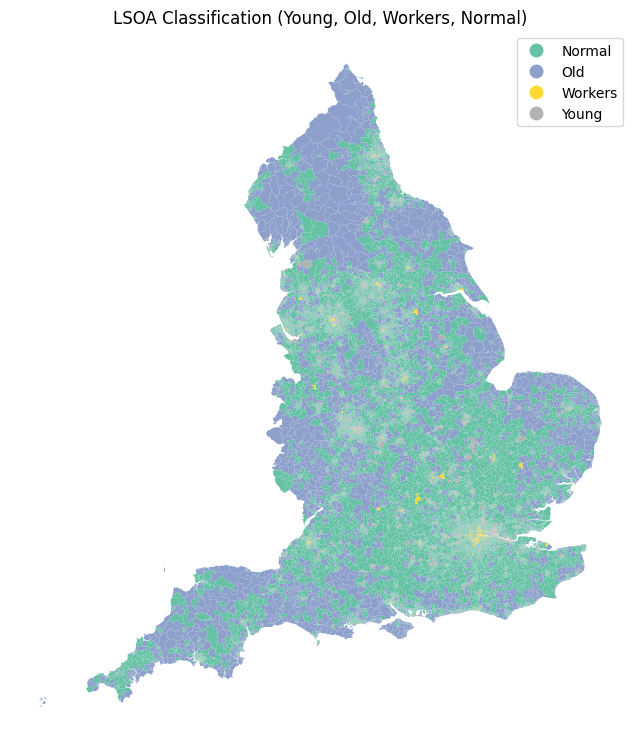

In [15]:
import geopandas as gpd

geo = gpd.read_file('LSOA_England_geom.gpkg')

gdf = geo.merge(lsoa_df, left_on = 'LSOA21CD', right_on = 'LSOACode', how = 'left')

gdf.plot(column = 'class_label', cmap = 'Set2', legend = True, figsize = (8,10))
plt.title('LSOA Classification (Young, Old, Workers, Normal)')
plt.axis('off')
plt.show()

### Interpretation of Mapping

The resulting map shows a clear spatial pattern:

- **Young (gray)** areas cluster strongly in and around large cities such as London, Birmingham and Manchester - reflecting urban youth populations.

- **Old (blue)** areas dominate rural and coastal regions, particularly along southern and eastern England, where retirement communities are common.

- **Workers (yellow)** areas appear in smaller pockets, often near city fringes and commuter belts.

- **Normal (green)** areas cover most of the country, forming the broad middle demographic range.

*Note: The colour scheme in this map differs from earlier plots due to automatic colour mapping in GeoPandas. The classification, however, remain the same.*

The map visually reinforces our earlier findings:
Urban regions have younger populations, rural and coastal zones are older and mixed areas lie in between. Hence, highlighting England's urban-rural age gradient.
